# Chapter 4 Classification

based on  "statlearning-notebooks" on Github

In [49]:
import numpy as np
import pandas as pd
# import statsmodels as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.The Stock Market Data

In [2]:
# stock makret 
smarket_df = pd.read_csv("./data/Smarket.csv")

In [3]:
smarket_df.shape

(1250, 9)

In [4]:
# lag: percentage returns from previous days
smarket_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [5]:
smarket_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [6]:
# correlations between numeric predictors
# remove non-numeric predictors/columns
smarket_df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


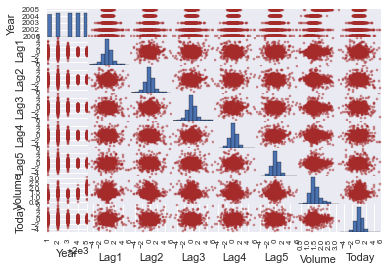

In [39]:
# plot pairwise correlations
axes = pd.tools.plotting.scatter_matrix(smarket_df, color="brown")


## 2. Logistic Regression

### 2.1 Exploration

Scikit-learn's LogisticRegression includes a penalty term which prevents overfitting, something that is a major concern when the number of predictors exceeds the number of observations. Those wishing for a logistic regression model that mirrors R's glm() should use statsmodels's GLM.
[cite]()

In [34]:
X = smarket_df[smarket_df.columns[1:-2]]
y = pd.factorize(smarket_df.Direction)[0] #Index([u'Up', u'Down']

clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

Sklearn doesn't give SE and P ?

In [58]:
# coefficients
print "=========="
print clf.coef_
print type(clf.coef_)
print clf.coef_.shape

# intercept
print "=========="
print clf.intercept_

[[ 0.07279035  0.04229102 -0.010958   -0.00921799 -0.01023031 -0.12793931]]
<type 'numpy.ndarray'>
(1, 6)
[ 0.11454962]


In [50]:
# predict probability for each sample
# prob of being ["up", "down"]=[0,1]
probs = clf.predict_proba(X)
ypred = [prob[0] for prob in probs][:5]
ypred

[0.50775595757199166,
 0.48208765404825193,
 0.48147907945142998,
 0.51561031224141374,
 0.51134987027174317]

In [52]:
ypreds = ["Up" if prob[0] > 0.5 else "Down" for prob in probs]
print ypreds[:5]
print list(smarket_df.Direction[:5])

['Up', 'Down', 'Down', 'Up', 'Up']
['Up', 'Up', 'Down', 'Up', 'Up']


In [57]:
# confusion matrix
yacts = smarket_df.Direction.values
confusion_matrix(yacts, ypreds)

array([[143, 459],
       [135, 513]])

In [59]:
# Returns the mean accuracy on the given test data and labels.
print "=========="
print "The accuracy score is "+ str(clf.score(X,y))

The accuracy score is 0.5248


### 2.2 Creating training and test set

In [80]:
# split data into training and test dataset
# It's a stock data, we use 2001-2004 data as training set and 2005 as test set
smarket_train_df = smarket_df.ix[smarket_df.Year != 2005]
smarket_test_df = smarket_df.ix[smarket_df.Year ==2005]
X_train = smarket_train_df.ix[:,1:-2]
y_train = pd.factorize(smarket_train_df.Direction)[0]
X_test = smarket_test_df.ix[:,1:-2]
y_test = pd.factorize(smarket_test_df.Direction)[0]

# train logisitic classifier with training set
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)

# use logisitic classifier with test set
y_pred = clf2.predict(X_test)

# calculate confusion matrix and accuracy
print confusion_matrix(y_test, y_pred)

print "accuracy rate is " + str(clf2.score(X_test, y_test))

[[40 71]
 [52 89]]
accuracy rate is 0.511904761905


## Linear Discriminant Analysis

## Quadratic Discriminant Analysis

## An Application to Caravan Insurance Data